# About Data
The data has been collected from the official website of the World Bank. "https://datacatalog.worldbank.org/dataset/gender-statistics" This data covers all the statistical data related to population, unemployment rates, health issues, economic measures, etc. of Southeast Asian countries from the year 1989-2018.

### Under this analysis, we will only analyze the economic measures of India and China from the year 1991 to 2017.

#### Under this, we will try:
* To analyze the trend of economic growth of India by considering GDP growth (annual %) from the year 1991 to 2017. (Bar chart)
* To analyze the trend of economic growth of India's GDP growth (annual %) concerning an increase of population from 1991 to 2017. ( Scatter chart)
* To analyze the trend of India's inflation Rate and GDP growth (annual %) over the years 1991 to 2017. (Line chart)
* To analyze the trend of economic growth between two countries by considering GDP growth (annual %) as a measure from the year 1991 to 2017. (Line charts)
* To Analyze the difference between the participation female labor force in India and China for 1991-2017. (Bar Chart)


In [1]:
#Import all the important libraries


In [2]:
%matplotlib notebook

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mlp
mlp.get_backend()

'nbAgg'

In [3]:
#Load Data

In [4]:
govt_data = pd.read_csv("D:\government_data\Gender_StatsData.csv", encoding = "cp1252", low_memory=False)

FileNotFoundError: File b'D:\\government_data\\Gender_StatsData.csv' does not exist

In [299]:
govt_data.shape #checking the shape 

(145176, 64)

In [300]:
#displaying data

In [301]:
def display_all(anytable):
    with pd.option_context("display.max_rows", 1000):
        with pd.option_context("display.max_columns", 73):
            display(anytable)

In [314]:
govt_data.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Arab World,ARB,"Access to anti-retroviral drugs, female (%)",SH.HIV.ARTC.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Access to anti-retroviral drugs, male (%)",SH.HIV.ARTC.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Account ownership at a financial institution o...,FX.OWN.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,13.775815,NaN,NaN,22.079350,NaN,NaN,25.635403,NaN,NaN
3,Arab World,ARB,Account ownership at a financial institution o...,FX.OWN.TOTL.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,30.377668,NaN,NaN,37.790764,NaN,NaN,48.328518,NaN,NaN
4,Arab World,ARB,"Adjusted net enrollment rate, primary, female ...",SE.PRM.TENR.FE,NaN,NaN,NaN,NaN,NaN,NaN,...,83.647552,83.052917,83.985252,82.810852,82.469597,82.847839,83.315712,83.685173,NaN,NaN


In [303]:
# DUPLICATE TO NEW DATA
new_data= pd.DataFrame(govt_data)


# columns to drop from new_data
drop_columns1= ["Country Code", "Indicator Code", "2018", "Unnamed: 63"]

#********** convert a range of integer into the list of strings
for i in range(1960,1991):
    drop_columns1.append(str(i).zfill(4))
    
print(drop_columns1)

#DROP
new_data.drop(drop_columns1, axis=1, inplace= True)
new_data.head(2)


['Country Code', 'Indicator Code', '2018', 'Unnamed: 63', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990']


,Country Name,Indicator Name,1991,1992,1993,1994,1995,1996,1997,1998,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Arab World,"Access to anti-retroviral drugs, female (%)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,"Access to anti-retroviral drugs, male (%)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [315]:
#data for India
new_data_India = pd.DataFrame(new_data.loc[new_data["Country Name"] == "India"])
new_data_India.reset_index(inplace = True, drop = True)

#make a duplicate column of indiacator name
new_data_India["Indicator_Name"] = new_data_India["Indicator Name"]
new_data_India.head(2)

#drop country name and indicator name
drop= ["Indicator Name", "Country Name"]
new_data_India.drop(drop, axis=1, inplace= True)
new_data_India.head()

#CHANGE COLUMN POSITION
cols_India = new_data_India.columns.tolist()
cols_India = cols_India[-1:] + cols_India[:-1]
new_data_India = new_data_India[cols_India]
new_data_India.head() 

,Indicator_Name,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,"Access to anti-retroviral drugs, female (%)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.000000,13.000000,18.00000,24.000000,30.000000,38.000000,43.000000,49.0,55.0,63.000000
1,"Access to anti-retroviral drugs, male (%)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.000000,13.000000,17.00000,21.000000,25.000000,31.000000,34.000000,37.0,42.0,50.000000
2,Account ownership at a financial institution o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,26.490501,NaN,NaN,43.132610,NaN,NaN,76.639633
3,Account ownership at a financial institution o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,43.737076,NaN,NaN,62.763363,NaN,NaN,83.008995
4,"Adjusted net enrollment rate, primary, female ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,97.653252,96.896599,97.19915,97.185753,97.715286,98.448631,NaN,NaN,NaN,NaN


In [316]:
#data for China
new_data_China = pd.DataFrame(new_data.loc[new_data["Country Name"] == "China"])
new_data_China.reset_index(inplace = True, drop = True)

#make a duplicate column of indiacator name
new_data_China["Indicator_Name"] = new_data_China["Indicator Name"]
new_data_China.head(2)

#drop country name
drop1= ["Indicator Name", "Country Name"]
new_data_China.drop(drop1, axis=1, inplace= True)
new_data_China.head()

#CHANGE COLUMN POSITION
cols_China = new_data_China.columns.tolist()
cols_China = cols_China[-1:] + cols_China[:-1]
new_data_China = new_data_China[cols_China]
new_data_China.head() 

,Indicator_Name,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,"Access to anti-retroviral drugs, female (%)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Access to anti-retroviral drugs, male (%)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Account ownership at a financial institution o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,60.008675,NaN,NaN,76.249733,NaN,NaN,76.364731
3,Account ownership at a financial institution o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,67.584793,NaN,NaN,81.368973,NaN,NaN,83.966637
4,"Adjusted net enrollment rate, primary, female ...",93.223549,92.07016,90.933281,89.642517,88.590981,88.104797,88.181236,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [317]:
China_data = new_data_China.set_index("Indicator_Name")
India_data = new_data_India.set_index("Indicator_Name")

In [318]:
China_data = China_data.loc[['GDP growth (annual %)',
 'Inflation, consumer prices (annual %)',
 'Labor force, female',
 'Labor force, female (% of total labor force)',
 'Labor force, total',
 'Population, female',
 'Population, female (% of total)',
 'Population, total',
 'Prevalence of anemia among women of reproductive age (% of women ages 15-49)',
 'Prevalence of obesity, female (% of female population ages 18+)',
 'Prevalence of overweight, female (% of female adults)',
 'Prevalence of overweight, male (% of male adults)']]

In [319]:
India_data = India_data.loc[['GDP growth (annual %)',
 'Inflation, consumer prices (annual %)',
 'Labor force, female',
 'Labor force, female (% of total labor force)',
 'Labor force, total',
 'Population, female',
 'Population, female (% of total)',
 'Population, total',
 'Prevalence of anemia among women of reproductive age (% of women ages 15-49)',
 'Prevalence of obesity, female (% of female population ages 18+)',
 'Prevalence of overweight, female (% of female adults)',
 'Prevalence of overweight, male (% of male adults)']]

In [320]:
India =India_data.T
India.head()

Indicator_Name,GDP growth (annual %),"Inflation, consumer prices (annual %)","Labor force, female","Labor force, female (% of total labor force)","Labor force, total","Population, female","Population, female (% of total)","Population, total",Prevalence of anemia among women of reproductive age (% of women ages 15-49),"Prevalence of obesity, female (% of female population ages 18+)","Prevalence of overweight, female (% of female adults)","Prevalence of overweight, male (% of male adults)"
1991,1.056831,13.870246,81520120.0,25.067076,325207930.0,429953320.0,48.240350,891273209.0,55.1,1.4,10.6,7.7
1992,5.482396,11.787817,83721468.0,25.151603,332867328.0,438611211.0,48.235767,909307016.0,54.8,1.5,10.9,8.0
1993,4.750776,6.326890,86135037.0,25.265458,340920150.0,447289190.0,48.230249,927403860.0,54.5,1.6,11.3,8.3
1994,6.658924,10.247936,88824522.0,25.415146,349494440.0,456012817.0,48.224612,945601831.0,54.3,1.7,11.6,8.6
1995,7.574492,10.224886,90868001.0,25.444564,357121473.0,464797662.0,48.219397,963922588.0,54.0,1.8,12.0,8.8


In [321]:
China = China_data.T
China.head()

Indicator_Name,GDP growth (annual %),"Inflation, consumer prices (annual %)","Labor force, female","Labor force, female (% of total labor force)","Labor force, total","Population, female","Population, female (% of total)","Population, total",Prevalence of anemia among women of reproductive age (% of women ages 15-49),"Prevalence of obesity, female (% of female population ages 18+)","Prevalence of overweight, female (% of female adults)","Prevalence of overweight, male (% of male adults)"
1991,9.294076,3.556686,292597132.0,45.142130,648168644.0,560248258.0,48.684219,1.150780e+09,35.5,1.8,16.9,14.9
1992,14.216164,6.353981,296978718.0,45.124437,658132789.0,567078771.0,48.677543,1.164970e+09,33.4,1.9,17.3,15.4
1993,13.867576,14.610079,301722781.0,45.102642,668969201.0,573550685.0,48.670334,1.178440e+09,31.4,2.0,17.8,15.9
1994,13.052159,24.256984,306230631.0,45.080997,679289835.0,579992796.0,48.663850,1.191835e+09,29.4,2.1,18.2,16.5
1995,10.949227,16.791227,310102535.0,45.061557,688175365.0,586268968.0,48.658882,1.204855e+09,27.6,2.3,18.7,17.1


In [322]:
China.index

Index(['1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'],
      dtype='object')

# Let's Start with our analysis:


###  Analyze the trend of economic growth of India by considering GDP growth (annual %) from the year 1991 to 2017

##### bar Graph for checking individual gorwth rate of every year since 1991

<IPython.core.display.Javascript object>


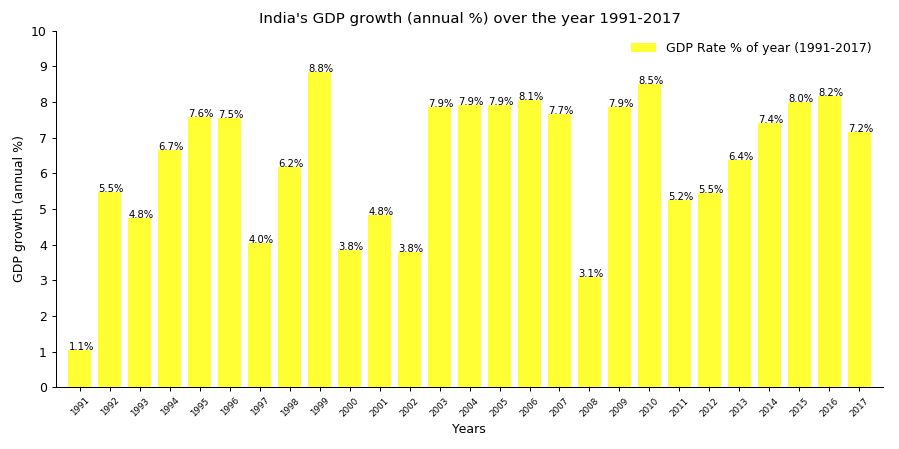

In [325]:
Index = range(len(India.index))

plt.figure(figsize=(10, 5))
bar = plt.bar(Index, np.array(India["GDP growth (annual %)"]), width = 0.75, label= "GDP Rate % of year (1991-2017)", color="yellow", alpha= 0.8)

plt.xticks(Index, India.index, fontsize = 7, rotation = 45, )
plt.yticks(np.arange(0,11,1), fontsize = 10)
plt.legend(frameon = False, fontsize = 10)

plt.xlabel('Years')
plt.ylabel('GDP growth (annual %)')
plt.title("India's GDP growth (annual %) over the year 1991-2017")

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()

plt.xlim([min(Index) -0.8 , max(Index) + 0.8 ])

for bar in bar:
    plt.gca().text(bar.get_x(), bar.get_height() - 0 , str(round(bar.get_height(), 1)) + "%" , color="black", fontsize= 8)

plt.show()

## line Chart to show the trend

<IPython.core.display.Javascript object>


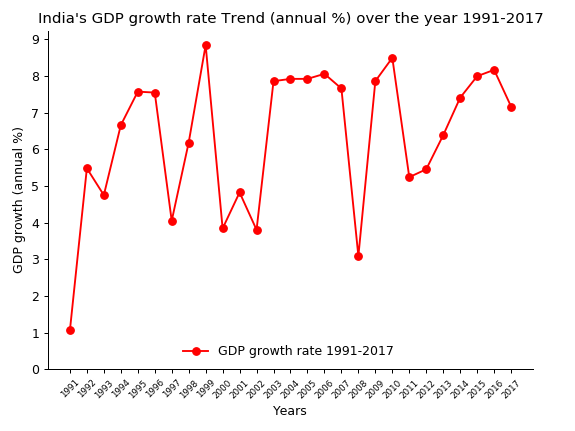

In [326]:
plt.figure()

plt.plot(India.index, np.array(India["GDP growth (annual %)"]), "-o" , color="red", label= "GDP growth rate 1991-2017 ")

plt.xticks(Index, India.index, fontsize = 7, rotation = 45, )
plt.yticks(np.arange(0,10,1), fontsize = 10)

plt.legend( frameon = False, loc=8)

plt.xlabel('Years')
plt.ylabel('GDP growth (annual %)')
plt.title("India's GDP growth rate Trend (annual %) over the year 1991-2017")

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()

plt.show()

## To analyze the trend of economic growth of India's GDP growth (annual %) concerning an increase of population from 1991 to 2017. ( Scatter chart)

<IPython.core.display.Javascript object>


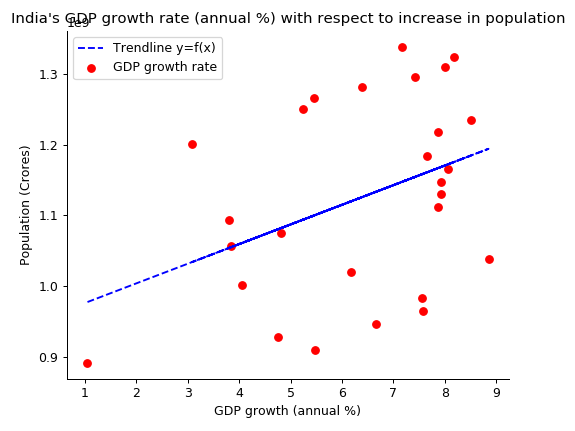

In [327]:
plt.figure()
plt.scatter(India["GDP growth (annual %)"], India["Population, total"] , color="red", label= "GDP growth rate")

#fit line
z = np.polyfit(India["GDP growth (annual %)"], India["Population, total"], 1)
p = np.poly1d(z)
plt.plot(India["GDP growth (annual %)"],p(India["GDP growth (annual %)"]),"r--", color= "blue", label= "Trendline y=f(x)")

plt.xticks(range(1, 10, 1), fontsize = 10)

plt.legend(frameon = True, loc=2)

plt.xlabel('GDP growth (annual %)')
plt.ylabel('Population (Crores)')
plt.title("India's GDP growth rate (annual %) with respect to increase in population")

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()


plt.show()
            

## Analyze the trend of India's inflation Rate and GDP growth (annual %) over the years 1991 to 2017. (Line chart)

<IPython.core.display.Javascript object>


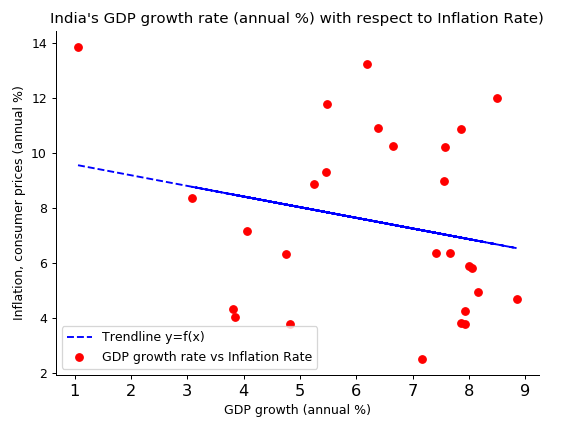

In [328]:
plt.figure()
plt.scatter(India["GDP growth (annual %)"], India["Inflation, consumer prices (annual %)"] , color="red", label= "GDP growth rate vs Inflation Rate")

#fit line
z = np.polyfit(India["GDP growth (annual %)"], India["Inflation, consumer prices (annual %)"], 1)
p = np.poly1d(z)
plt.plot(India["GDP growth (annual %)"],p(India["GDP growth (annual %)"]),"r--", color= "blue", label= "Trendline y=f(x)")

plt.xticks(range(1, 10, 1), fontsize = 13)

plt.legend(frameon = True , loc=3)

plt.xlabel('GDP growth (annual %)')
plt.ylabel('Inflation, consumer prices (annual %)')
plt.title("India's GDP growth rate (annual %) with respect to Inflation Rate)")

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()


plt.show()
            

### Analyze the trend of economic growth between two countries by considering GDP growth (annual %) as a measure from the year 1991 to 2017. (Line charts)

<IPython.core.display.Javascript object>


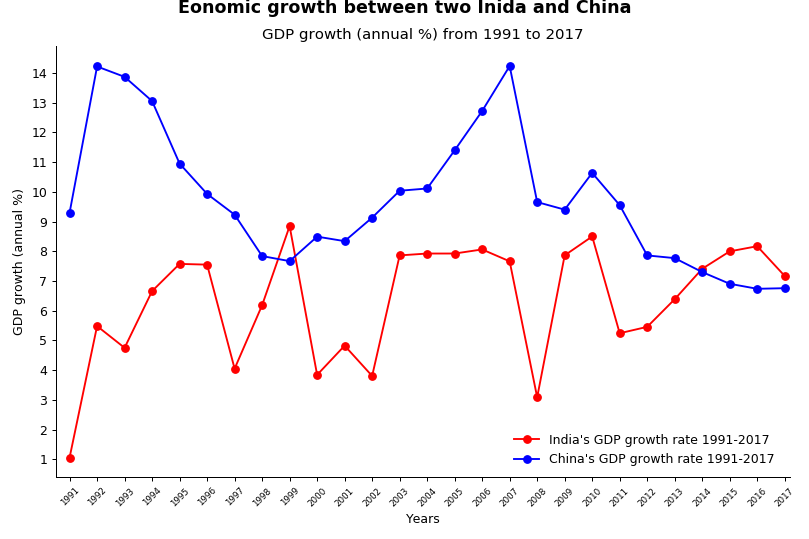

In [402]:
plt.figure(figsize=(9, 6))

plt.plot(India.index, np.array(India["GDP growth (annual %)"]), "-o" , color="red", label= "India's GDP growth rate 1991-2017 ")
plt.plot(China.index, np.array(China["GDP growth (annual %)"]), "-o" , color="blue", label= "China's GDP growth rate 1991-2017 ")

plt.xticks(Index, India.index, fontsize = 7, rotation = 45, )
plt.yticks(np.arange(0,15,1), fontsize = 10)

plt.legend( frameon = False, loc=4)

plt.xlabel('Years')
plt.ylabel('GDP growth (annual %)')

plt.suptitle("Eonomic growth between two Inida and China", fontsize=14, fontweight="bold" , y=1)
plt.title("\nGDP growth (annual %) from 1991 to 2017",fontsize=12)

plt.gca().fill_between(len(India.index),
                     np.array(China["GDP growth (annual %)"]),
                     np.array(India["GDP growth (annual %)"]),  
                     facecolor = "yellow", 
                     alpha = 0.5)

plt.xlim([min(Index) -0.5 , max(Index) + 0.2 ])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()

plt.show()

### Analyze the difference between the participation female labor force in India and China for 1991-2017. (Bar Chart)

<IPython.core.display.Javascript object>


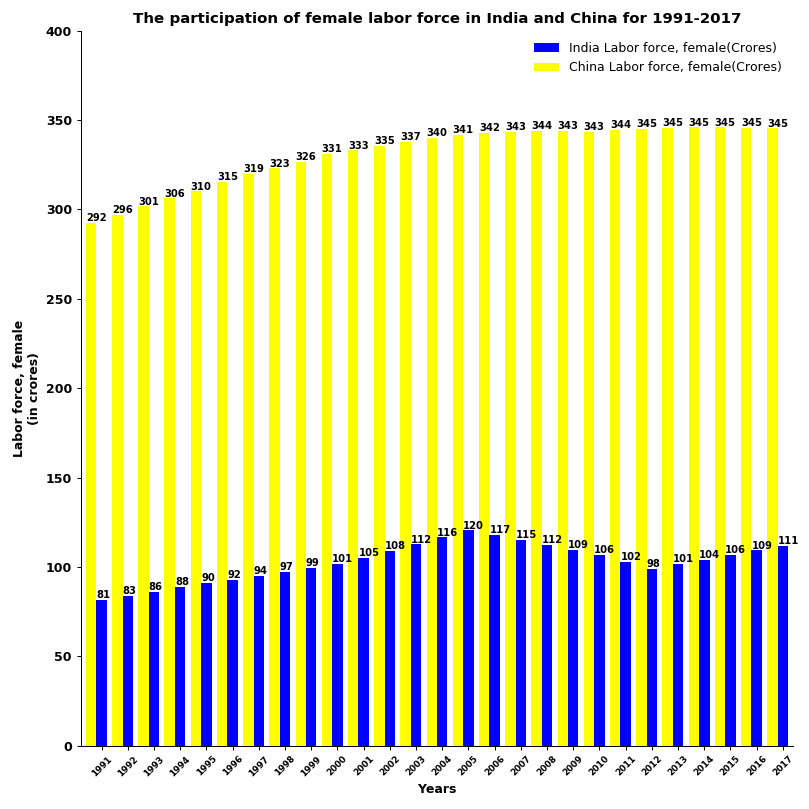

In [393]:
plt.figure(figsize=(9,9))
ax= plt.subplot(111)
w = 0.4
Index = np.arange(len(India.index))

bar = ax.bar(Index, np.array((India["Labor force, female"])/1000000), width=w, color='blue', align='center', label= "India Labor force, female(Crores)")
bar1 = ax.bar(Index-w, np.array((China["Labor force, female"])/1000000) , width=w, color='yellow', align='center', label= "China Labor force, female(Crores)")


plt.xticks(Index, India.index, fontsize = 7, rotation = 45, fontweight="bold" )
plt.yticks(np.arange(0, 450, 50), fontsize = 10, fontweight="bold")
plt.legend(frameon = False, fontsize = 10, loc= 1)

plt.xlabel('Years', fontweight="bold")
plt.ylabel("Labor force, female\n(in crores)", fontweight="bold")
plt.title("The participation of female labor force in India and China for 1991-2017", fontweight="bold")

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()

plt.xlim([min(Index) -0.8 , max(Index) + 0.4 ])

for bar in bar:
    plt.gca().text(bar.get_x(), bar.get_height() + 1 , str(int(bar.get_height())) , color="black", fontsize= 8, fontweight="bold")

for bar in bar1:
    plt.gca().text(bar.get_x(), bar.get_height() + 1 , str(int(bar.get_height())) , color="black", fontsize= 8, fontweight="bold")

plt.show()
